# Chapter 4 Simple Regression

- run-model4-4.py


In [2]:
import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import arviz
import cmdstanpy

### Just Run `run-model4-4.py`

11:35:17 - cmdstanpy - INFO - CmdStan start processing
chain 1 |                                                                                                | 00:00 Status
chain 2 |                                                                                                | 00:00 Status

chain 3 |                                                                                                | 00:00 Status


chain 1 |███████████████████████████████████████████████████████▍     | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 2 |████▎                                                                                           | 00:00 Status

chain 3 |████▎                                                                                           | 00:00 Status


chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed
chain 2 |████████████████████████████████████████████████████████████████████████████████████| 00:0


11:35:17 - cmdstanpy - INFO - CmdStan done processing.


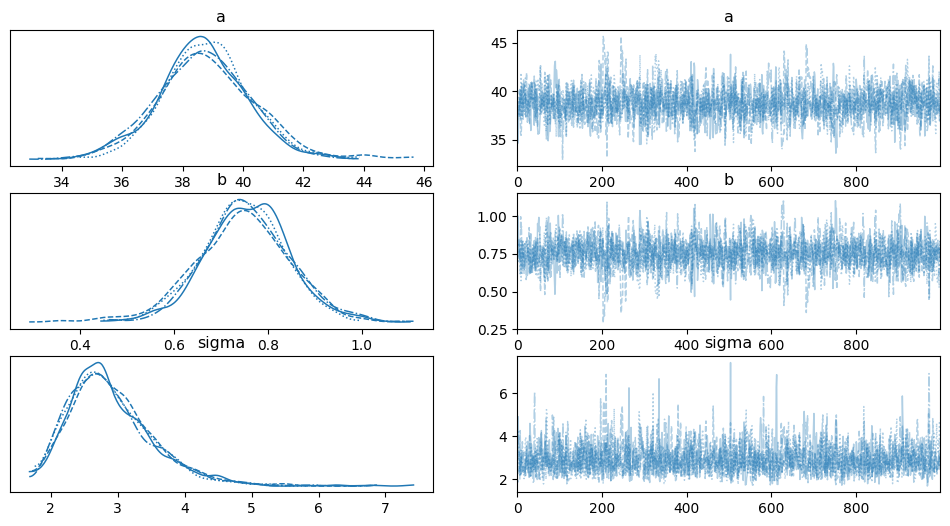

In [3]:
d = pandas.read_csv('input/data-salary.csv')
data = d.to_dict('list')
data.update({'N':len(d)})
model = cmdstanpy.CmdStanModel(stan_file='model/model4-4.stan')
fit = model.sample(data=data, seed=123)

fit.save_csvfiles('output/result-model4-4')
fit.summary().to_csv('output/fit-summary.csv')

axes = arviz.plot_trace(fit)
fig = axes.ravel()[0].figure
fig.savefig('output/fit-plot.pdf')

### Step-by-Step 

In [4]:
d = pandas.read_csv('input/data-salary.csv')
d.describe()

,X,Y
count,15.000000,15.000000
mean,13.933333,49.180000
std,8.455486,6.842117
min,1.000000,38.000000
25%,6.000000,45.300000
50%,16.000000,48.400000
75%,20.000000,52.650000
max,26.000000,61.000000


In [5]:
d.head(4)

,X,Y
0,7,45.7
1,10,48.2
2,16,51.8
3,25,53.5


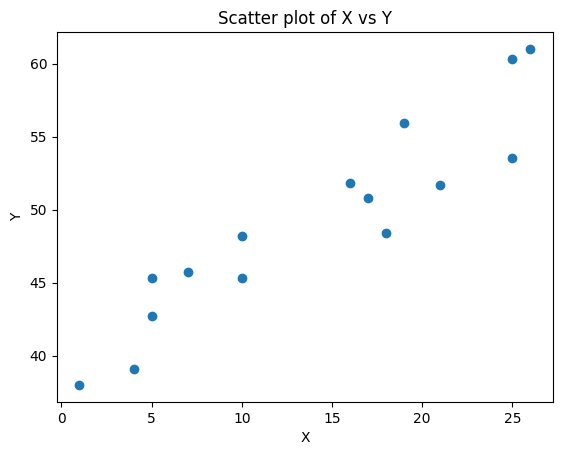

In [6]:
import matplotlib.pyplot as plt

plt.scatter(d.X, d.Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X vs Y')
plt.show()

In [7]:
data = d.to_dict('list') # Convert DataFrame to dictionary format 
data.update({'N':len(d)})
data 

{'X': [7, 10, 16, 25, 5, 25, 26, 18, 17, 1, 5, 4, 19, 10, 21],
 'Y': [45.7,
  48.2,
  51.8,
  53.5,
  42.7,
  60.3,
  61.0,
  48.4,
  50.8,
  38.0,
  45.3,
  39.1,
  55.9,
  45.3,
  51.7],
 'N': 15}

In [8]:
with open('model/model4-4.stan', 'r') as f:
    stan_code = f.read()
print("// Stan Model code for model4-4")
print(stan_code)

// Stan Model code for model4-4
data {
  int N;
  vector[N] X;
  vector[N] Y;
}

parameters {
  real a;
  real b;
  real<lower=0> sigma;
}

model {
  Y[1:N] ~ normal(a + b*X[1:N], sigma);
}



In [9]:
# Run the model with the data
model = cmdstanpy.CmdStanModel(stan_file='model/model4-4.stan')

# Sample from the model through HMC-NUTS
fit = model.sample(data=data, seed=123)

11:35:21 - cmdstanpy - INFO - CmdStan start processing
chain 1 |                                                                                                | 00:00 Status
chain 2 |                                                                                                | 00:00 Status

chain 3 |                                                                                                | 00:00 Status


chain 1 |███████████████████████████████████████████████▏             | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 4 |████▎                                                                                           | 00:00 Status
chain 2 |████▎                                                                                           | 00:00 Status

chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed
chain 2 |████████████████████████████████████████████████████████████████████████████████████| 00:0


11:35:21 - cmdstanpy - INFO - CmdStan done processing.


In [10]:
samples_df = fit.draws_pd()
samples_df.describe()

,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,a,b,sigma
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.000000,4000.000000,4000.000000
mean,2.500000,500.500000,2000.500000,-21.624264,0.887411,0.382612,2.702750,8.272500,0.0,23.143216,38.750405,0.750858,2.905507
std,1.118174,288.711081,1154.844867,1.371583,0.171529,0.053266,0.752352,4.432455,0.0,1.843411,1.554571,0.095969,0.647918
min,1.000000,1.000000,1.000000,-29.933900,0.000093,0.313326,1.000000,1.000000,0.0,20.051700,32.909500,0.290956,1.671820
25%,1.750000,250.750000,1000.750000,-22.233925,0.861183,0.342981,2.000000,7.000000,0.0,21.814975,37.770850,0.693228,2.452825
50%,2.500000,500.500000,2000.500000,-21.274500,0.957381,0.382769,3.000000,7.000000,0.0,22.806350,38.700000,0.750614,2.797035
75%,3.250000,750.250000,3000.250000,-20.613975,0.990799,0.422400,3.000000,11.000000,0.0,24.166875,39.699550,0.810808,3.241442
max,4.000000,1000.000000,4000.000000,-19.934400,1.000000,0.451584,4.000000,31.000000,0.0,33.426300,45.657900,1.110710,7.425260


In [11]:
draws = samples_df[['a', 'b', 'sigma']]
draws.head(4)

,a,b,sigma
0,39.0054,0.704182,2.59179
1,34.6161,1.002950,3.54076
2,35.3078,0.955086,4.90249
3,36.5479,0.858938,3.68938


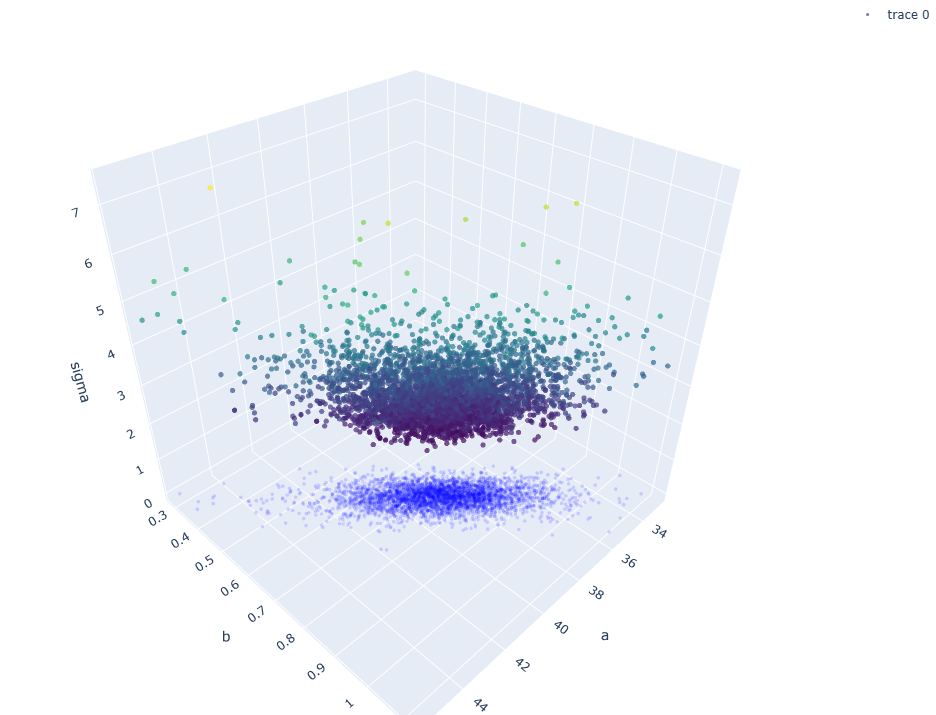

In [12]:
import plotly.graph_objs as go
import plotly.offline as pyoff

trace = go.Scatter3d(
    x=draws['a'],
    y=draws['b'],
    z=draws['sigma'],
    mode='markers',
    marker=dict(
        size=3,
        color=draws['sigma'],
        colorscale='Viridis',
        opacity=0.7
    )
)

layout = go.Layout(
    scene=dict(
        xaxis_title='a',
        yaxis_title='b',
        zaxis_title='sigma'
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    height=700,
    width=1000,
)

proj_ab = go.Scatter3d(
    x=draws['a'],
    y=draws['b'],
    z=[0] * len(draws),
    mode='markers',
    marker=dict(
        size=2,
        color='rgba(5,5,255,0.5)',
        opacity=0.3
    ),
    showlegend=False
)

layout.height = 700

fig = go.Figure(data=[trace, proj_ab], layout=layout)
pyoff.iplot(fig)

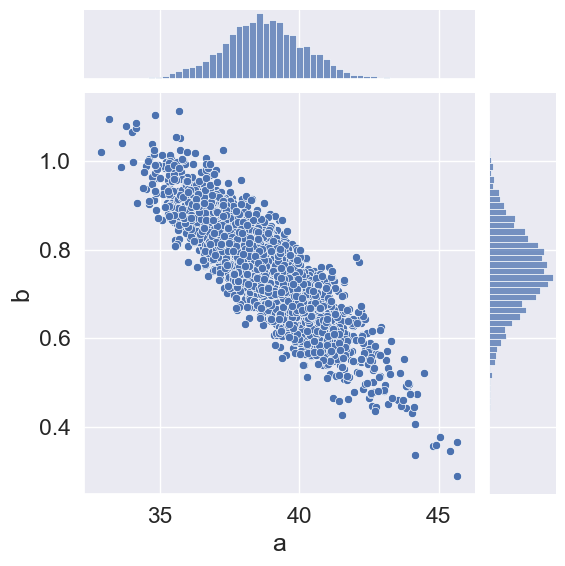

In [13]:
sns.set(font_scale=1.5)
p = sns.jointplot(data=draws, x='a', y='b')

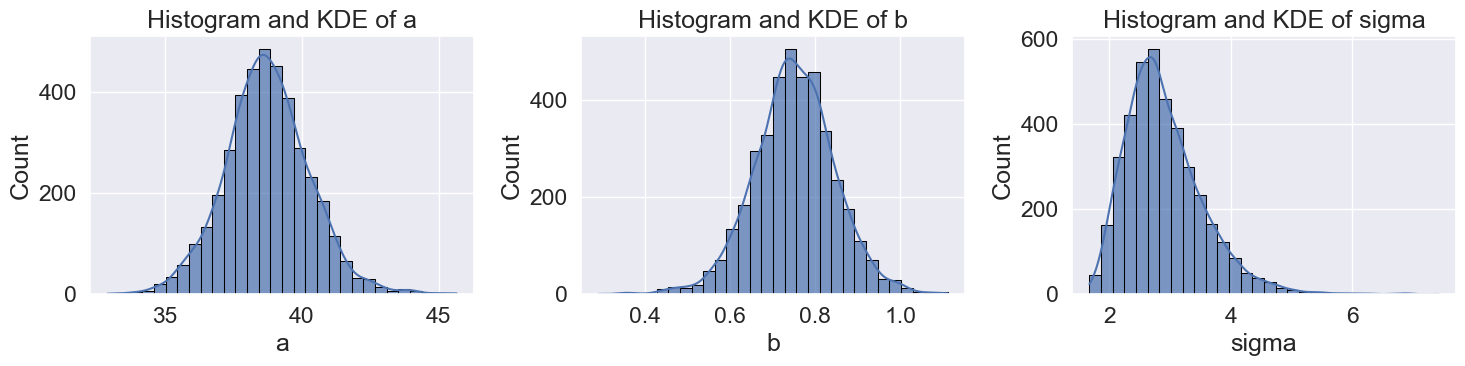

In [14]:
import seaborn as sns

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(draws['a'], bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel('a')
plt.title('Histogram and KDE of a')

plt.subplot(1, 3, 2)
sns.histplot(draws['b'], bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel('b')
plt.title('Histogram and KDE of b')

plt.subplot(1, 3, 3)
sns.histplot(draws['sigma'], bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel('sigma')
plt.title('Histogram and KDE of sigma')

plt.tight_layout()
plt.show()

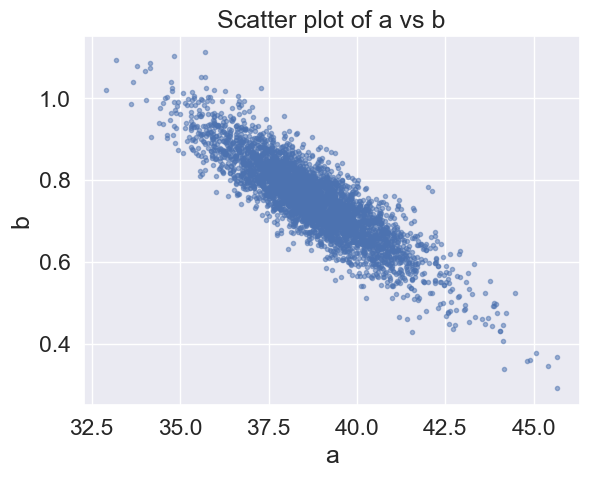

In [15]:
plt.scatter(draws['a'], draws['b'], alpha=0.5, marker='.')
plt.xlabel('a')
plt.ylabel('b')
plt.title('Scatter plot of a vs b')
plt.show()

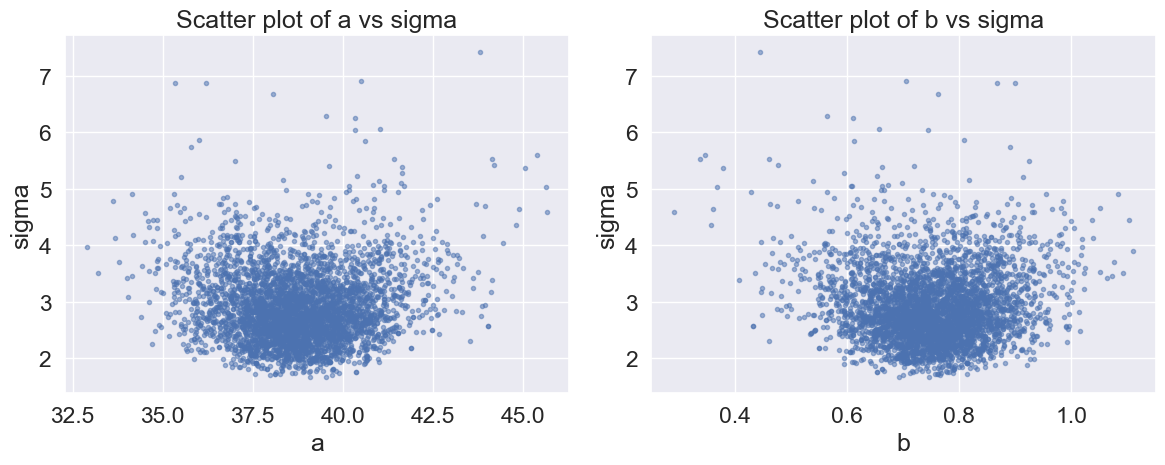

In [16]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(draws['a'], draws['sigma'], alpha=0.5, marker='.')
plt.xlabel('a')
plt.ylabel('sigma')
plt.title('Scatter plot of a vs sigma')

plt.subplot(1, 2, 2)
plt.scatter(draws['b'], draws['sigma'], alpha=0.5, marker='.')
plt.xlabel('b')
plt.ylabel('sigma')
plt.title('Scatter plot of b vs sigma')

plt.tight_layout()
plt.show()

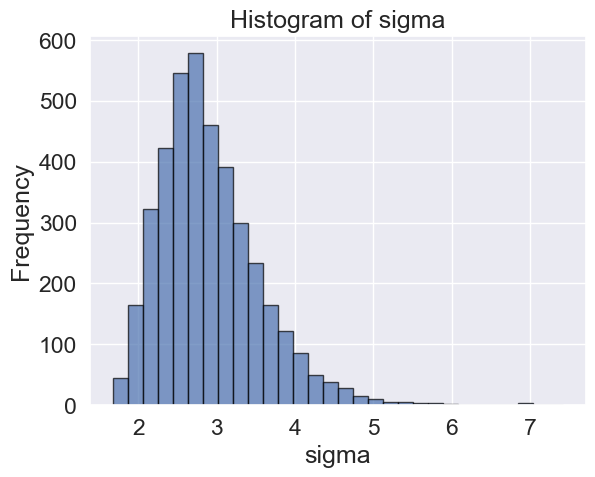

In [17]:
plt.hist(draws['sigma'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('sigma')
plt.ylabel('Frequency')
plt.title('Histogram of sigma')
plt.show()

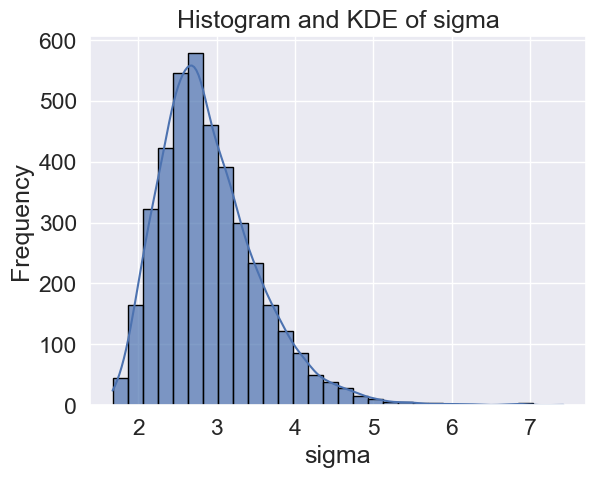

In [18]:
import seaborn as sns

sns.histplot(draws['sigma'], bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel('sigma')
plt.ylabel('Frequency')
plt.title('Histogram and KDE of sigma')
plt.show()

In [19]:
draws_df = draws.copy()

# compute the mean and standard deviation of 'a', 'b', and 'sigma'
means = draws_df.mean(axis=0)
stds = draws_df.std(axis=0)
print(means['a'], means['b'], means['sigma'], stds['a'], stds['b'], stds['sigma'])
print(means.a, means.b, means.sigma, stds.a, stds.b, stds.sigma)

38.750405375 0.7508575102499999 2.9055065625 1.5545711406997376 0.09596900439005711 0.6479181124417391
38.750405375 0.7508575102499999 2.9055065625 1.5545711406997376 0.09596900439005711 0.6479181124417391


1 26


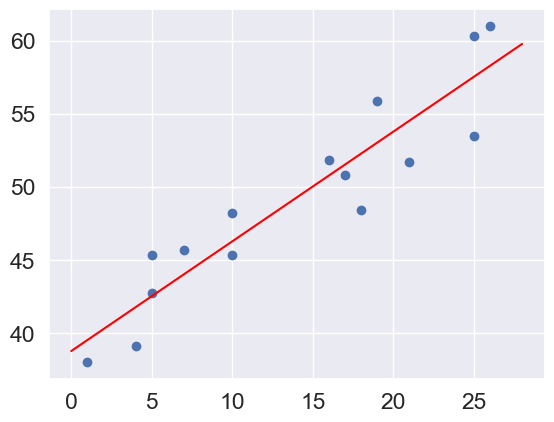

In [20]:
print(d.X.min(), d.X.max())
Xp = np.linspace(d.X.min()-1, d.X.max()+2, 100)

ymean = means['a'] + means['b'] * Xp
plt.plot(Xp, ymean, color='red', label='Mean prediction')
plt.scatter(d.X, d.Y, label='Data points')

1 26


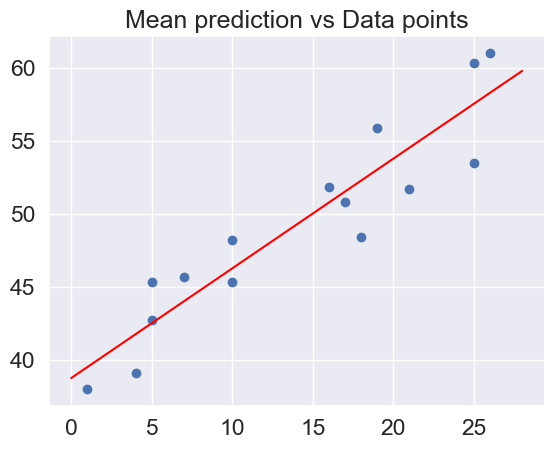

In [21]:
import numpy as np
print(d.X.min(), d.X.max())
Xp = np.linspace(d.X.min()-1, d.X.max()+2, 100)

ymean = means['a'] + means['b'] * Xp

plt.plot(Xp, ymean, color='red', label='Mean prediction')
plt.scatter(d.X, d.Y, label='Data points')
plt.title('Mean prediction vs Data points')
plt.show()

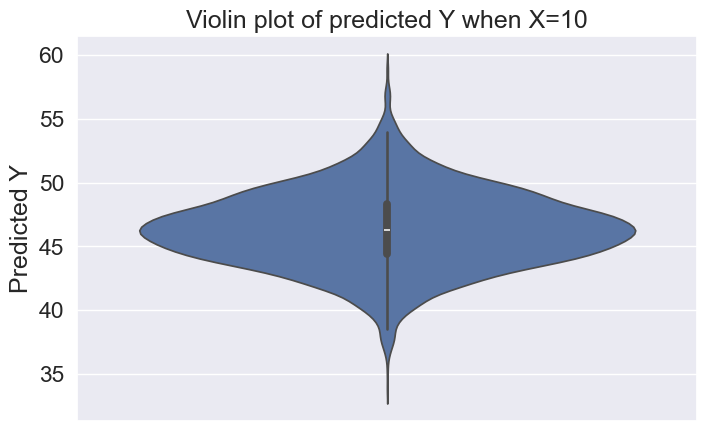

In [22]:
import seaborn as sns

# What would be the predicted value of Y when X=10?
Xpred = 10
Ybase = draws_df['a'] + draws_df['b'] * Xpred
Ypred = Ybase + np.random.normal(0, draws_df['sigma'], size=len(Ybase))

plt.figure(figsize=(8, 5))
sns.violinplot(y=Ypred, inner='box')
plt.ylabel('Predicted Y')
plt.title('Violin plot of predicted Y when X=10')
plt.show()

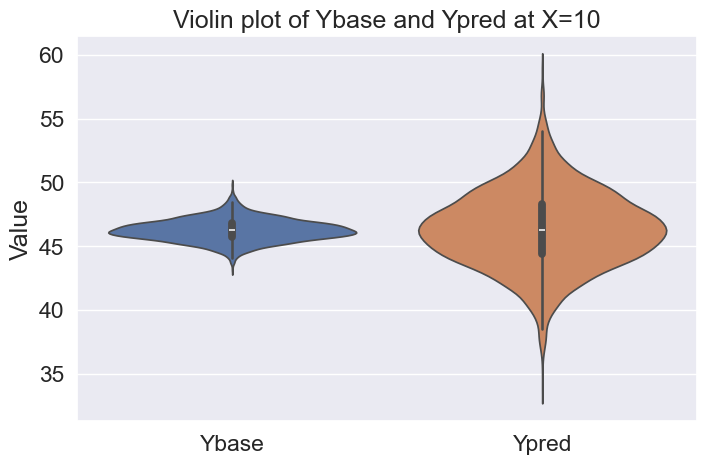

In [23]:
import pandas as pd
import seaborn as sns

df_pred = pd.DataFrame({'Ybase': Ybase, 'Ypred': Ypred})
df_pred.head()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.grid(True)
sns.violinplot(data=df_pred, inner='box')
plt.ylabel('Value')
plt.title(f'Violin plot of Ybase and Ypred at X={Xpred}')
plt.show()

In [24]:
Xp = np.arange(0, 30)
Np = len(Xp)
N_ms = len(draws_df)

Yb = np.zeros(shape=(N_ms, Np)) # without noise
Yp = np.zeros(shape=(N_ms, Np)) # with noise (sigma)
for n in range(Np):
    Yb[:,n] = draws_df.a + draws_df.b * Xp[n]
    Yp[:,n] = Yb[:,n] + np.random.normal(0, draws_df.sigma, N_ms)

# mean prediction
Ymean = draws_df.a.mean() + draws_df.b.mean() * Xp

# compute quantiles
qua = np.quantile(Yb, [0.025, 0.25, 0.50, 0.75, 0.975], axis=0)

# make a DataFrame for the quantiles
d_est = pandas.DataFrame(np.column_stack([Xp, qua.T]),
                         columns=['X', '2.5%', '25%', '50%', '75%', '97.5%'])

print('Shape of Xp:', Xp.shape)
print('Shape of Yp:', Yp.shape)
print('Shape of Qua:', qua.shape) 
print(d_est.head(2))
print(d_est.tail(2))

Shape of Xp: (30,)
Shape of Yp: (4000, 30)
Shape of Qua: (5, 30)
     X       2.5%        25%        50%        75%      97.5%
0  0.0  35.695673  37.770850  38.700000  39.699550  41.907393
1  1.0  36.631793  38.563194  39.444614  40.391584  42.500377
       X       2.5%        25%        50%        75%      97.5%
28  28.0  56.628321  58.792578  59.772382  60.757060  62.787033
29  29.0  57.162172  59.494935  60.515143  61.566485  63.707122


In [25]:
Yb_df = pandas.DataFrame(Yb, columns=Xp)
print(Yb_df.shape)
print(Yb_df.tail(2))

(4000, 30)
           0          1         2          3         4          5         6   \
3998  40.3961  41.064600  41.73310  42.401600  43.07010  43.738600  44.40710   
3999  36.9589  37.796755  38.63461  39.472465  40.31032  41.148175  41.98603   

             7         8          9   ...       20         21        22  \
3998  45.075600  45.74410  46.412600  ...  53.7661  54.434600  55.10310   
3999  42.823885  43.66174  44.499595  ...  53.7160  54.553855  55.39171   

             23        24         25        26         27        28         29  
3998  55.771600  56.44010  57.108600  57.77710  58.445600  59.11410  59.782600  
3999  56.229565  57.06742  57.905275  58.74313  59.580985  60.41884  61.256695  

[2 rows x 30 columns]


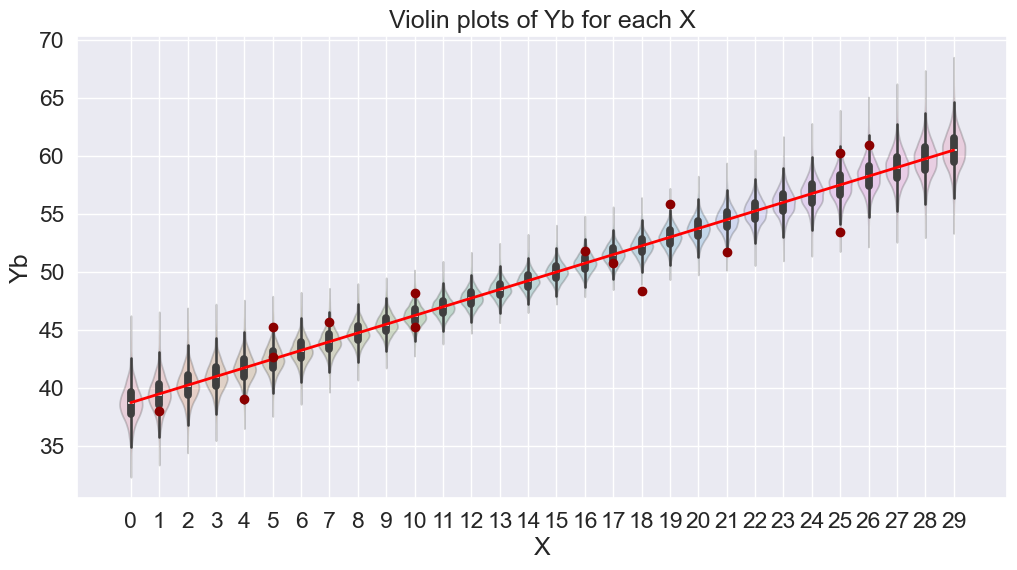

In [26]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.violinplot(data=Yb_df, inner='box', alpha=.25)
plt.plot(Xp, Ymean, color='red', label='Base prediction', linewidth=2)
plt.scatter(d.X, d.Y, color='darkred', label='Data points', zorder=10)
plt.xlabel('X')
plt.ylabel('Yb')
plt.grid(True)
plt.title('Violin plots of Yb for each X')

plt.show()

In [27]:
print('Density Summary: :', d_est.shape)
print(d_est.head(2))

Density Summary: : (30, 6)
     X       2.5%        25%        50%        75%      97.5%
0  0.0  35.695673  37.770850  38.700000  39.699550  41.907393
1  1.0  36.631793  38.563194  39.444614  40.391584  42.500377


### Bayesian CI for baseline annual income
- Fig. 4.8 (in page 61)
- from 0 to 28 years of work experience
- For each X, CI is computed. The plot is a connection of those CIs.
- No measurement noise first.

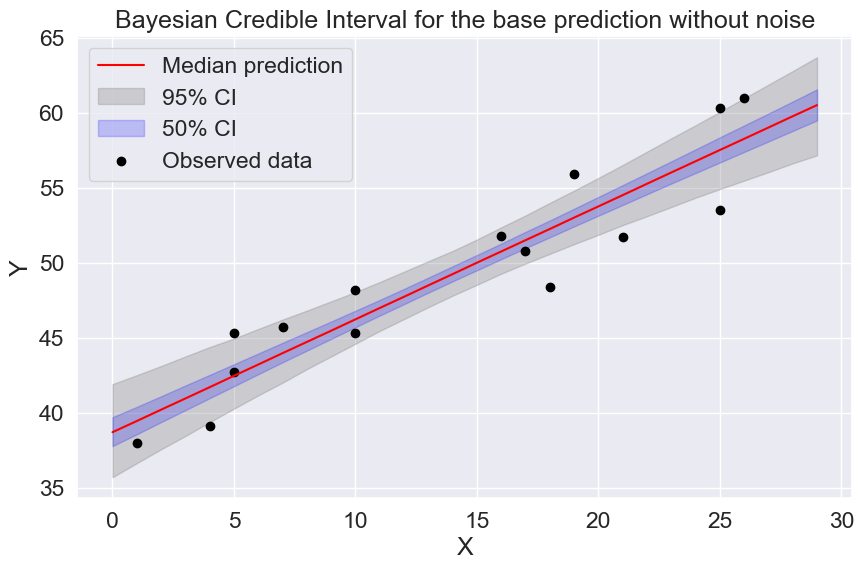

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(d_est['X'], d_est['50%'], color='red', label='Median prediction')
plt.fill_between(d_est['X'], d_est['2.5%'], d_est['97.5%'], color='gray', alpha=0.3, label='95% CI')
plt.fill_between(d_est['X'], d_est['25%'], d_est['75%'], color='blue', alpha=0.2, label='50% CI')
plt.scatter(d.X, d.Y, color='black', label='Observed data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bayesian Credible Interval for the base prediction without noise')
plt.legend()
plt.grid(True)
plt.show()

### Now with measurement noise
- See Fig. 4.8

In [29]:
Yb = np.zeros(shape=(N_ms, Np)) # without noise
Yp = np.zeros(shape=(N_ms, Np)) # with noise (sigma)
for n in range(Np):
    Yb[:,n] = draws_df.a + draws_df.b * Xp[n]
    Yp[:,n] = Yb[:,n] + np.random.normal(0, draws_df.sigma, N_ms)

# compute quantiles for the predictions with measurement noise

qua = np.quantile(Yp, [0.025, 0.25, 0.50, 0.75, 0.975], axis=0)

# make a DataFrame for the quantiles
d_est = pandas.DataFrame(np.column_stack([Xp, qua.T]),
                         columns=['X', '2.5%', '25%', '50%', '75%', '97.5%'])

print('Shape of Xp:', Xp.shape)
print('Shape of Yp:', Yp.shape)
print('Shape of Qua:', qua.shape) 
print(d_est.head(2))
print(d_est.tail(2))

Shape of Xp: (30,)
Shape of Yp: (4000, 30)
Shape of Qua: (5, 30)
     X       2.5%        25%        50%        75%      97.5%
0  0.0  31.978270  36.482891  38.632292  40.821823  45.368298
1  1.0  32.885772  37.300484  39.504955  41.594999  46.062756
       X       2.5%        25%        50%        75%      97.5%
28  28.0  53.163283  57.729956  59.820693  61.827647  66.295334
29  29.0  53.820465  58.420438  60.620301  62.689489  67.261043


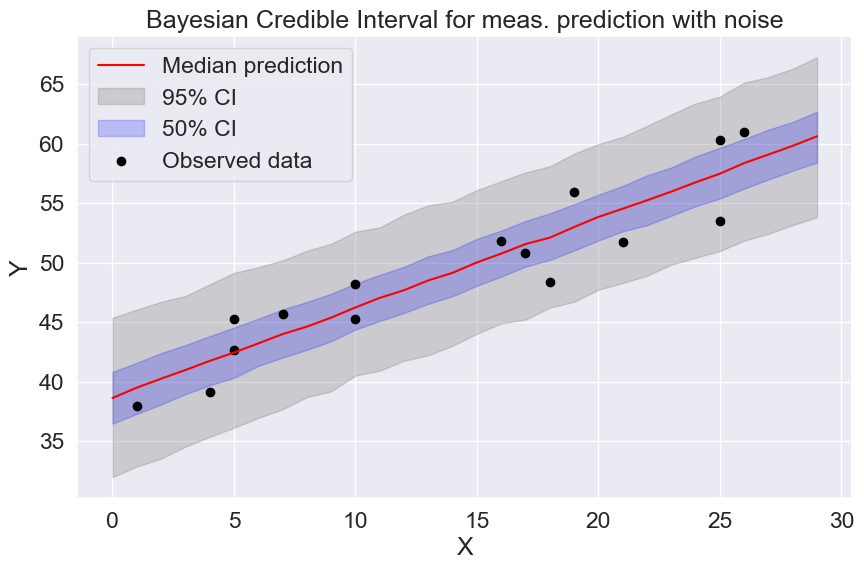

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(d_est['X'], d_est['50%'], color='red', label='Median prediction')
plt.fill_between(d_est['X'], d_est['2.5%'], d_est['97.5%'], color='gray', alpha=0.3, label='95% CI')
plt.fill_between(d_est['X'], d_est['25%'], d_est['75%'], color='blue', alpha=0.2, label='50% CI')
plt.scatter(d.X, d.Y, color='black', label='Observed data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bayesian Credible Interval for meas. prediction with noise')
plt.legend()
plt.grid(True)
plt.show()